In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Read files
stress_data=pd.read_csv('D:/MSDA_SJSU/Data_270/data/combined_data.csv')

In [3]:
stress_data.head()

,Unnamed: 0,id,time,x,y,z,hr,bvp,eda,temp,label
0,0,0,0,2.59375,4.06250,61.28125,118.00,15.760000,0.566449,34.79,0
1,1,0,1,-4.46875,6.50000,63.15625,113.50,-41.960313,0.654746,34.79,0
2,2,0,2,-4.12500,5.28125,63.65625,93.00,26.097031,0.664677,34.79,0
3,3,0,3,-7.62500,5.46875,63.15625,93.25,4.685781,0.677812,34.68,0
4,4,0,4,-14.59375,5.87500,62.28125,86.40,-7.058125,0.685500,34.66,0


Since id and time columns are relevant to generate model we will be dropping them

In [4]:
stress_data.drop(columns=['Unnamed: 0','id','time'],inplace=True)

In [5]:
## Renaming the Accelerometer data columns
stress_data.columns=('ACC_X','ACC_Y','ACC_Z','hr','bvp','eda','temp','stress_label')

In [6]:
stress_data.head()

,ACC_X,ACC_Y,ACC_Z,hr,bvp,eda,temp,stress_label
0,2.59375,4.06250,61.28125,118.00,15.760000,0.566449,34.79,0
1,-4.46875,6.50000,63.15625,113.50,-41.960313,0.654746,34.79,0
2,-4.12500,5.28125,63.65625,93.00,26.097031,0.664677,34.79,0
3,-7.62500,5.46875,63.15625,93.25,4.685781,0.677812,34.68,0
4,-14.59375,5.87500,62.28125,86.40,-7.058125,0.685500,34.66,0


### Checking Null Value

In [7]:
stress_data.isnull().sum()

ACC_X           0
ACC_Y           0
ACC_Z           0
hr              0
bvp             0
eda             0
temp            0
stress_label    0
dtype: int64

### Checking for data statistics

In [8]:
stress_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137215 entries, 0 to 137214
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ACC_X         137215 non-null  float64
 1   ACC_Y         137215 non-null  float64
 2   ACC_Z         137215 non-null  float64
 3   hr            137215 non-null  float64
 4   bvp           137215 non-null  float64
 5   eda           137215 non-null  float64
 6   temp          137215 non-null  float64
 7   stress_label  137215 non-null  int64  
dtypes: float64(7), int64(1)
memory usage: 8.4 MB


### Feature engineering

In [9]:
stress_data['acc_mag']=np.sqrt(stress_data.ACC_X**2+stress_data.ACC_Y**2+stress_data.ACC_Z**2)
stress_data['acc_xy_sqrt']=np.sqrt(stress_data.ACC_X**2+stress_data.ACC_Y**2)

In [10]:
stress_data.head()

,ACC_X,ACC_Y,ACC_Z,hr,bvp,eda,temp,stress_label,acc_mag,acc_xy_sqrt
0,2.59375,4.06250,61.28125,118.00,15.760000,0.566449,34.79,0,61.470506,4.819901
1,-4.46875,6.50000,63.15625,113.50,-41.960313,0.654746,34.79,0,63.646930,7.887948
2,-4.12500,5.28125,63.65625,93.00,26.097031,0.664677,34.79,0,64.008010,6.701285
3,-7.62500,5.46875,63.15625,93.25,4.685781,0.677812,34.68,0,63.849509,9.383382
4,-14.59375,5.87500,62.28125,86.40,-7.058125,0.685500,34.66,0,64.237429,15.731915


In [11]:
stress_data.describe()

,ACC_X,ACC_Y,ACC_Z,hr,bvp,eda,temp,stress_label,acc_mag,acc_xy_sqrt
count,137215.000000,137215.000000,137215.000000,137215.000000,137215.000000,137215.000000,137215.000000,137215.000000,137215.000000,137215.000000
mean,-25.527088,-1.289276,37.763983,81.671589,0.027899,1.226292,31.640413,0.351747,64.051395,41.916917
std,31.212371,20.579846,25.093879,13.269286,26.723458,1.946584,2.402277,0.477517,2.064449,17.146448
min,-71.250000,-74.781250,-63.500000,48.000000,-456.254687,0.000000,21.410000,0.000000,9.638130,0.227503
25%,-49.781250,-11.906250,23.750000,72.170000,-4.357813,0.245657,30.010000,0.000000,63.710305,28.315449
50%,-31.000000,-2.531250,47.093750,79.530000,0.058594,0.482980,31.610000,0.000000,64.298217,42.654693
75%,-12.031250,8.000000,57.125000,89.130000,4.699531,1.217613,33.490000,1.000000,64.870243,58.338348
max,70.531250,100.250000,67.656250,146.780000,563.400000,19.685075,38.270000,1.000000,105.402030,103.282498


## Plots for EDA

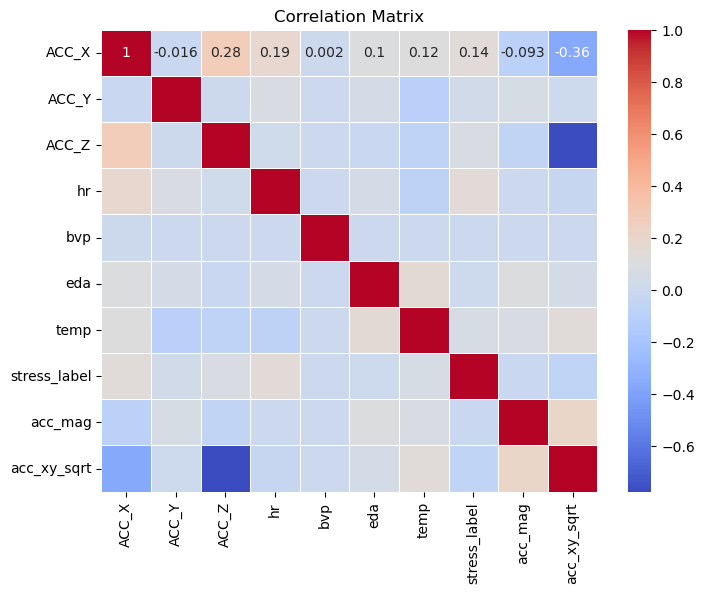

In [12]:

corr_matrix = stress_data[['ACC_X','ACC_Y', 'ACC_Z', 'hr','bvp','eda','temp','stress_label','acc_mag','acc_xy_sqrt']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')

plt.show()

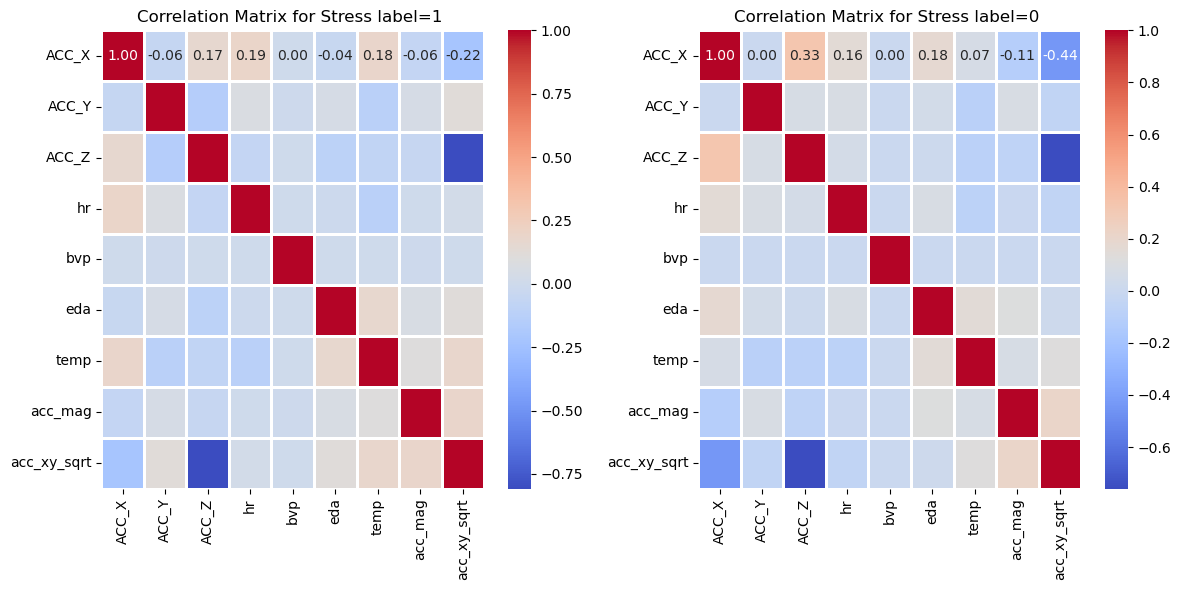

In [13]:
conditions = [
    {'stress_label': 1,  'title': 'Stress label=1 '},
    {'stress_label': 0,  'title': 'Stress label=0 '}
]

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

for i, condition in enumerate(conditions):
    corr_matrix = stress_data[
        (stress_data['stress_label'] == condition['stress_label']) 
    ][['ACC_X','ACC_Y', 'ACC_Z', 'hr','bvp','eda','temp','acc_mag','acc_xy_sqrt']].corr()

    sns.heatmap(
        corr_matrix,
        annot=True,
        cmap='coolwarm',
        xticklabels=True,
        yticklabels=True,
        fmt=".2f",
        linewidths=2,
        ax=ax[i]
    )
    
    ax[i].set_title(f'Correlation Matrix for {condition["title"]}')

plt.tight_layout()

plt.show()

### Checking distribution for each features

D:\MSDA_SJSU\Application dwnload\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\MSDA_SJSU\Application dwnload\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\MSDA_SJSU\Application dwnload\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\MSDA_SJSU\Application dwnload\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be

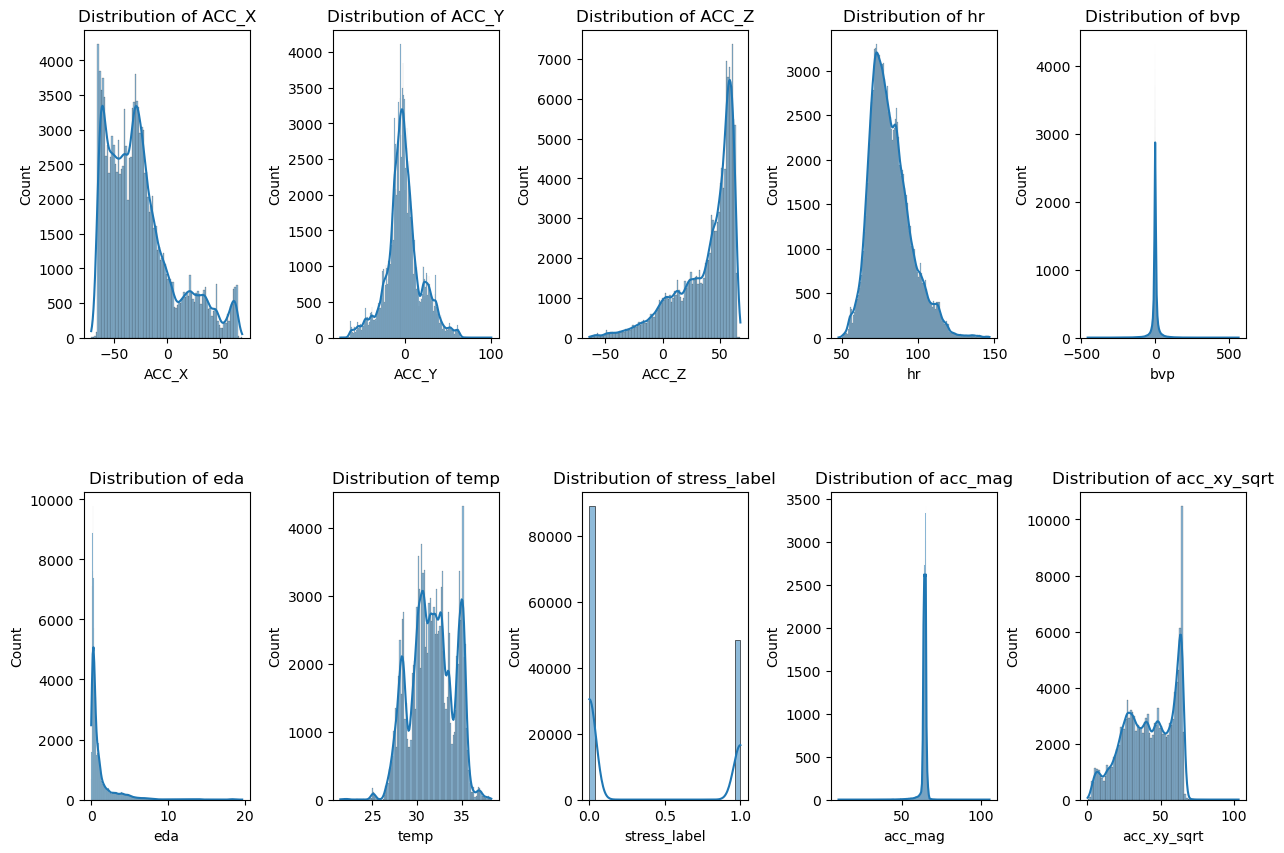

In [14]:
def plotPerColumnDistribution(dataframe, num_cols_per_row=5, figsize=(15, 10), num_columns=10):
    columns_to_plot = dataframe.columns[:num_columns]
    num_cols = len(columns_to_plot)
    num_rows = (num_cols + num_cols_per_row - 1) // num_cols_per_row
    
    fig, axes = plt.subplots(num_rows, num_cols_per_row, figsize=figsize)
    fig.subplots_adjust(wspace=0.5, hspace=0.5)
    
    for i, column in enumerate(columns_to_plot):
        row_idx = i // num_cols_per_row
        col_idx = i % num_cols_per_row
        
        if num_rows > 1:
            ax = axes[row_idx, col_idx]
        else:
            ax = axes[col_idx]
        
        sns.histplot(dataframe[column], ax=ax, kde=True)
        ax.set_title(f'Distribution of {column}')
        
    for i in range(num_cols, num_cols_per_row * num_rows):
        fig.delaxes(axes[i])
    
    plt.show()

# plot
plotPerColumnDistribution(stress_data, num_cols_per_row=5, num_columns=10)


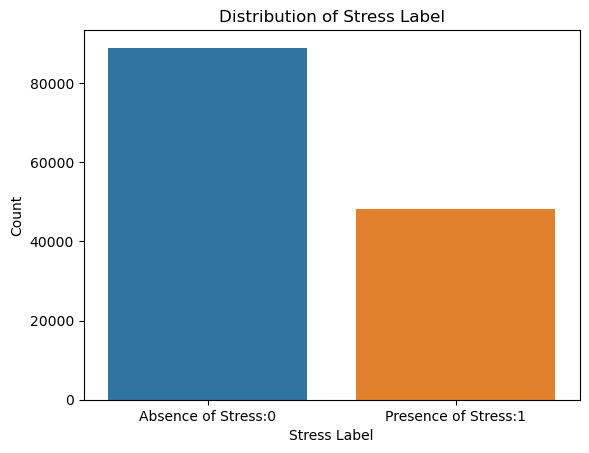

In [15]:

sns.countplot(x='stress_label', data=stress_data)
plt.title('Distribution of Stress Label')
plt.xlabel('Stress Label')
plt.ylabel('Count')
plt.xticks([0, 1], ['Absence of Stress:0', 'Presence of Stress:1']) 
plt.show()

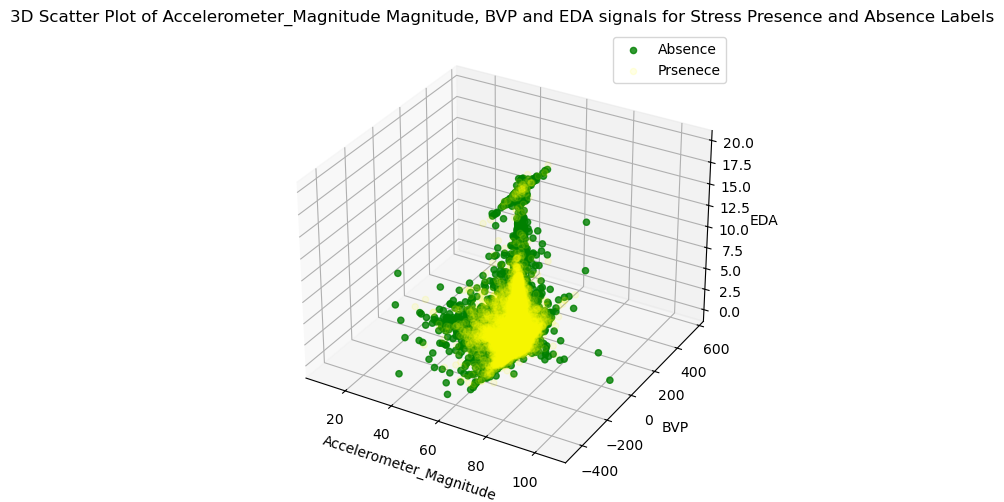

In [16]:
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot for both temperature sets
fig = plt.figure(figsize=(8, 6))
sns.set_palette("pastel")
ax = fig.add_subplot(111, projection='3d')

sc1 = ax.scatter(stress_data['acc_mag'][(stress_data['stress_label']==0)],stress_data['bvp'][(stress_data['stress_label']==0)],stress_data['eda'][(stress_data['stress_label']==0)],c='green', label='Absence',alpha=0.8)

sc2 = ax.scatter(stress_data['acc_mag'][(stress_data['stress_label']==1)],stress_data['bvp'][(stress_data['stress_label']==1)],stress_data['eda'][(stress_data['stress_label']==1)], c='yellow',label='Prsenece', alpha=0.1)
plt.title('3D Scatter Plot of Accelerometer_Magnitude Magnitude, BVP and EDA signals for Stress Presence and Absence Labels')
ax.set_xlabel('Accelerometer_Magnitude')
ax.set_ylabel('BVP')
ax.set_zlabel('EDA')
#fig.colorbar(sc1, ax=ax, label='Stress Labels')
plt.legend()
plt.show()

In [17]:
#pip install imblearn

In [18]:
#pip install --upgrade scikit-learn imbalanced-learn

### Handling class imbalance : using Oversampling technique ADASYN

Reference : 
- https://medium.com/@ruinian/an-introduction-to-adasyn-with-code-1383a5ece7aa

- https://medium.com/quantyca/oversampling-and-undersampling-adasyn-vs-enn-60828a58db39

In [19]:
#!pip uninstall -v scikit-learn
#pip install --upgrade sklearn==0.19.1

In [20]:
#!pip show scikit-learn

In [21]:
#!pip install -U scikit-learn

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import ADASYN
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score,accuracy_score
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [23]:
feature=stress_data.drop(columns=['stress_label'])

In [24]:
target=stress_data.stress_label

In [25]:
#pip install fast_ml --quiet

In [26]:
# Split the data into train, validation, and test sets (70-15-15 split)
X_train, X_temp, y_train, y_temp = train_test_split(feature, target, train_size=0.7, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [27]:
# Print the shapes of each dataset
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_valid.shape, y_valid.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (96050, 9) (96050,)
Validation set shape: (20582, 9) (20582,)
Testing set shape: (20583, 9) (20583,)


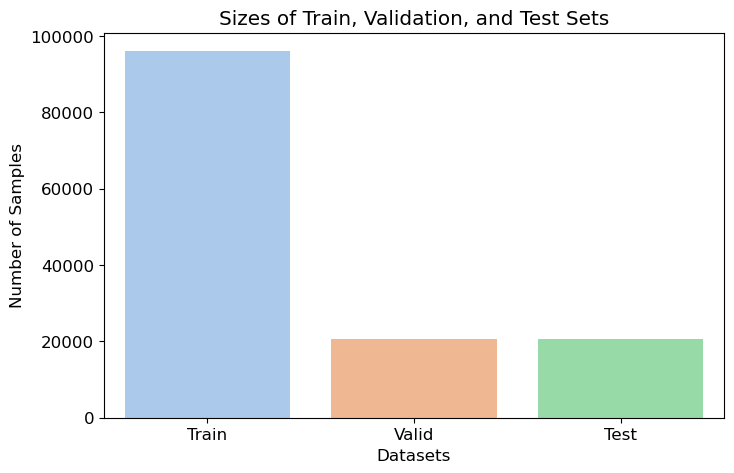

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame to hold the sizes
data = {
    'Dataset': ['Train', 'Valid', 'Test'],
    'Size': [len(X_train), len(X_valid), len(X_test)]
}
df_sizes = pd.DataFrame(data)

# Plotting with Seaborn
plt.figure(figsize=(8, 5))
sns.barplot(x='Dataset', y='Size', data=df_sizes, palette='pastel')
plt.title('Sizes of Train, Validation, and Test Sets')
plt.xlabel('Datasets')
plt.ylabel('Number of Samples')
plt.show()


In [70]:
X_valid.head()

,ACC_X,ACC_Y,ACC_Z,hr,bvp,eda,temp,acc_mag,acc_xy_sqrt
21546,-4.15625,-5.00000,63.00000,97.73,1.103906,0.127492,28.53,63.334623,6.501878
105354,-55.75000,6.96875,32.31250,81.70,0.334531,0.745750,31.53,64.812990,56.183859
54405,-6.25000,4.65625,60.81250,100.50,46.033594,3.212613,29.51,61.309896,7.793790
125148,20.81250,23.21875,55.65625,97.50,-2.142500,0.221817,31.39,63.795679,31.181253
94451,-57.25000,1.62500,33.12500,94.13,-0.050156,2.537972,29.57,66.162442,57.273058


In [28]:
y_train.head(10)

76161     0
97056     0
46254     0
108076    0
106643    0
30195     0
99906     1
54763     1
124402    1
80734     1
Name: stress_label, dtype: int64

In [29]:
y_train.head(6)

76161     0
97056     0
46254     0
108076    0
106643    0
30195     0
Name: stress_label, dtype: int64

### We will perform data standardization

In [30]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [31]:
# define the pipeline
steps = [
    ('scalar', StandardScaler()),
    ('model', RandomForestClassifier(min_samples_leaf=5 ,random_state=123))
]

In [34]:
RandomForest_pipe = Pipeline(steps)
RandomForest_pipe.fit(X_train, y_train)

Pipeline(steps=[('scalar', StandardScaler()),
                ('model',
                 RandomForestClassifier(min_samples_leaf=5, random_state=123))])

In [35]:
y_train.head(6)

76161     0
97056     0
46254     0
108076    0
106643    0
30195     0
Name: stress_label, dtype: int64

### Building base RandomForest Classification model before oversampling the target variable

In [38]:

#model = RandomForestClassifier(min_samples_leaf=5 ,random_state=123)
#model.fit(train, y_train)
print('Validation set Recall: ', 
      recall_score(y_valid, RandomForest_pipe.predict(X_valid)))

Validation set Recall:  0.9066794942275975


### We will perform ADASYN to rebalance dataset

In [39]:
ada = ADASYN(random_state=42)
X_ada, y_ada = ada.fit_resample(X_train, y_train)

print('Resampled dataset after ADASYN shape %s' % Counter(y_ada))

Resampled dataset after ADASYN shape Counter({1: 63884, 0: 62273})


#### After resampling using ADASYN , target variable is resampled:
- Stress_label : 1 has 63716 data
- Stress_label : 0 has 62012 data

In [40]:
X_ada.head(5)

,ACC_X,ACC_Y,ACC_Z,hr,bvp,eda,temp,acc_mag,acc_xy_sqrt
0,-32.21875,-26.84375,49.40625,68.60,4.952969,0.071135,32.49,64.804416,41.936080
1,-26.53125,4.15625,57.46875,75.22,2.952969,0.267782,32.65,63.433736,26.854825
2,21.81250,-59.00000,-10.53125,65.67,0.760000,0.138962,31.29,63.778463,62.902982
3,-1.00000,-6.62500,63.12500,81.18,4.299688,0.265502,35.27,63.479573,6.700047
4,-28.78125,15.68750,55.87500,85.58,-0.093906,0.342115,35.34,64.780195,32.778926


Text(0.5, 0.98, 'Stress Label data with ADASYN oversampling')

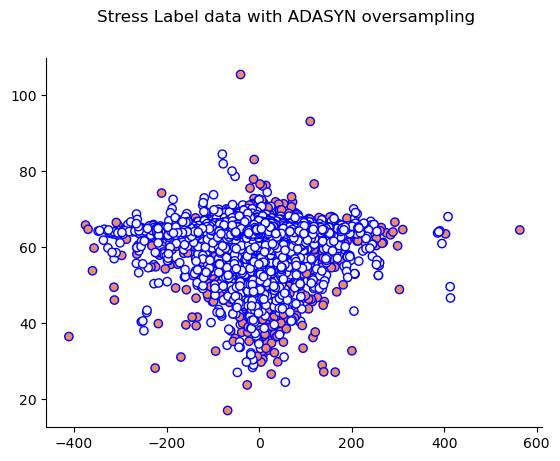

In [41]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
#ax = fig.add_subplot()
kwarg_params = {'linewidth': 1, 'edgecolor': 'blue'}
colors = ['#ef8a62' if v == 0 else '#f7f7f7' if v == 1 else '#67a9cf' for v in y_ada]
plt.scatter(X_ada.bvp,X_ada.acc_mag, c=colors, **kwarg_params)

ax.set_xlabel('BVP')
ax.set_ylabel('EDA')
sns.despine()
plt.suptitle("Stress Label data with ADASYN oversampling")

###  We will perform Random Forest Classification again on ADASYN resampled dataset

In [42]:
# define the pipeline

steps = [
    ('scalar', StandardScaler()),
    ('ada_model', RandomForestClassifier(min_samples_leaf=5 ,random_state=123))
]

In [43]:
ada_pipe = Pipeline(steps)


In [44]:
#ada_model = RandomForestClassifier(min_samples_leaf=5,
#                                   random_state=123)
ada_pipe.fit(X_ada, y_ada)
y_pred=ada_pipe.predict(X_valid)
print('Validation set Recall: ', 
      recall_score(y_valid, y_pred))

Validation set Recall:  0.9605552501374381


In [45]:
## For printing standardized data
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#scaler = scaler.fit(X_ada)
# standardization the dataset and print the first 5 rows
#normalized = scaler.transform(X_ada)
#for i in range(6):
# print(normalized[i])

In [46]:
print('Validation set Accuracy: ', 
      accuracy_score(y_valid, y_pred))

Validation set Accuracy:  0.943348556991546


In [47]:
##Testing the model on y_test
ypred_testdata=ada_pipe.predict(X_test)

In [48]:
print('Validation set Accuracy: ', accuracy_score(y_test, ypred_testdata))

Validation set Accuracy:  0.9448574065976777


In [49]:
ada_pipe.get_params

<bound method Pipeline.get_params of Pipeline(steps=[('scalar', StandardScaler()),
                ('ada_model',
                 RandomForestClassifier(min_samples_leaf=5, random_state=123))])>

## Model Building 

### Basic  XGBoost Model

In [286]:
# Function to measure execution time of a Python function
import time

def timer(func):
    """Function decorator to measure execution time of functions."""
    def wrapper(*args, **kwargs):
        start_time = time.time()  # Start time
        print(f'Starting execution of {func.__name__}')
        result = func(*args, **kwargs)  # Execute the function
        end_time = time.time()  # End time
        execution_time = end_time - start_time  # Calculate execution time
        print(f'{func.__name__} executed in: {execution_time} seconds')
        return result
    return wrapper

In [287]:
#!pip install xgboost

In [288]:
# import libraries for XGBClassifier Model

from xgboost import XGBClassifier
import xgboost as xgb
from xgboost import cv

from sklearn.model_selection import KFold,cross_val_score,GridSearchCV
from sklearn.metrics import (
           accuracy_score,
           confusion_matrix, 
           roc_curve, 
           roc_auc_score, 
           f1_score, 
           precision_recall_curve,
           classification_report,
           brier_score_loss,
           log_loss,
           roc_auc_score,
           precision_score)

import itertools

### Function to evaluation model on test dataset

In [290]:


def predict_eval_Data(X_test,y_test,model):
    y_pred_test=model.predict(X_test)
    print('Accuracy_score: ', accuracy_score(y_test, y_pred_test))
    print('Precision_score: ', precision_score(y_test, y_pred_test))
    print('Recall_score: ', recall_score(y_test, y_pred_test))
    print('F1_score: %.5f' %  f1_score(y_test, y_pred_test))
    print('Brier_score_loss: %.5f' %  brier_score_loss(y_test, y_pred_test))
    print('Log_loss: %.5f' %  log_loss(y_test, y_pred_test))
    print('Roc_auc_score: %.5f' %  roc_auc_score(y_test, y_pred_test))
    print('Classification Report: ', classification_report(y_test, y_pred_test))


### XGBClassifier with auc metric

In [291]:
# declare parameters
params = {
            'objective':'binary:logistic',
            'max_depth': 4,
            'alpha': 10,
            'learning_rate': 0.5,
# subsample ratio of columns when constructing each tree
            'colsample_bytree': 0.8,
            'n_estimators':200
        }
               
# instantiate the classifier 
xgb_clf = XGBClassifier(**params)

# evaluation metric as a list
eval_set = [(X_ada, y_ada), (X_valid, y_valid)]

import time
start_time = time.time()  # Start time

# fit the classifier to the training data
xgb_clf.fit(X_ada, y_ada,eval_metric='auc',eval_set=eval_set)


## Execution Time capture
end_time = time.time()  # End time
execution_time = end_time - start_time  # Calculate execution time
print(f'Execution time for xgb classifier: {execution_time} seconds')  # Print execution time

D:\MSDA_SJSU\Application dwnload\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.64232	validation_1-auc:0.62718
[1]	validation_0-auc:0.67330	validation_1-auc:0.66198
[2]	validation_0-auc:0.68831	validation_1-auc:0.67050
[3]	validation_0-auc:0.72315	validation_1-auc:0.70581
[4]	validation_0-auc:0.74286	validation_1-auc:0.73361
[5]	validation_0-auc:0.75450	validation_1-auc:0.74851
[6]	validation_0-auc:0.76452	validation_1-auc:0.75991
[7]	validation_0-auc:0.77626	validation_1-auc:0.77493
[8]	validation_0-auc:0.77911	validation_1-auc:0.77632
[9]	validation_0-auc:0.79278	validation_1-auc:0.79368
[10]	validation_0-auc:0.79796	validation_1-auc:0.80066
[11]	validation_0-auc:0.80132	validation_1-auc:0.80504
[12]	validation_0-auc:0.80362	validation_1-auc:0.80816
[13]	validation_0-auc:0.81046	validation_1-auc:0.81530
[14]	validation_0-auc:0.81438	validation_1-auc:0.81856
[15]	validation_0-auc:0.81911	validation_1-auc:0.82573
[16]	validation_0-auc:0.82559	validation_1-auc:0.83256
[17]	validation_0-auc:0.83003	validation_1-auc:0.83763
[18]	validation_0-au

### We will be saving this model

In [292]:
import pickle
Pkl_Filename = "Pickle_XGB_auc_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(xgb_clf, file)

#### Execution time for xgb classifier with AUC: 14.15818476676941 seconds

In [293]:
#Prediction with XGBoost Model 

y_pred=xgb_clf.predict(X_valid)


### Evaluation on Validation set

In [204]:

predict_eval_Data(X_valid,y_valid,xgb_clf)

Accuracy_score:  0.893547760178797
Precision_score:  0.8023546200499465
Recall_score:  0.9272952171522815
F1_score: 0.86031
Brier_score_loss: 0.10645
Log_loss: 3.83693
Roc_auc_score: 0.90119
Classification Report:                precision    recall  f1-score   support

           0       0.96      0.88      0.91     13306
           1       0.80      0.93      0.86      7276

    accuracy                           0.89     20582
   macro avg       0.88      0.90      0.89     20582
weighted avg       0.90      0.89      0.90     20582



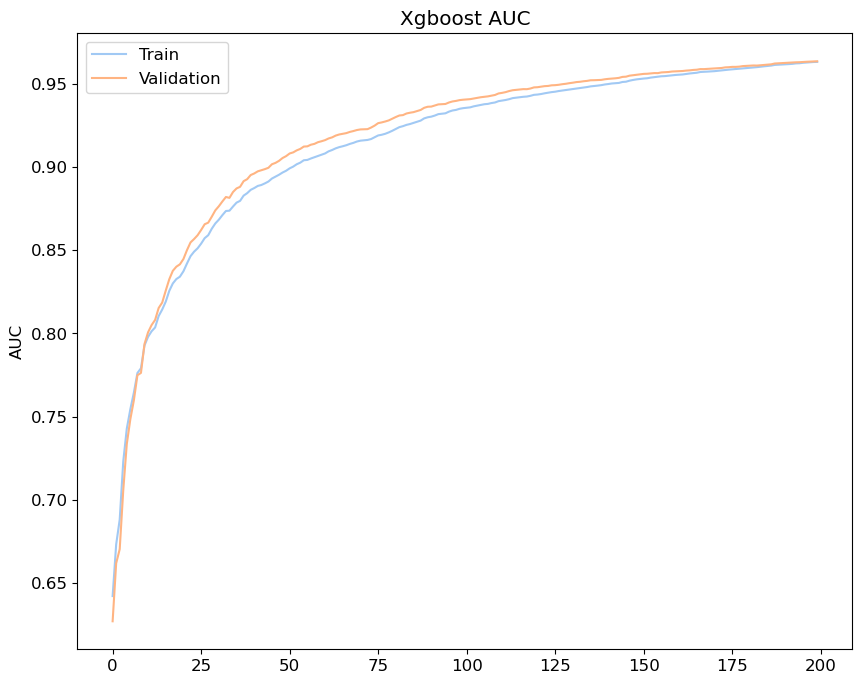

In [182]:
plt.rcParams['figure.figsize'] = 10, 8
plt.rcParams['font.size'] = 12


history = xgb_clf.evals_result()
x_axis = range(len(history['validation_0']['auc']))
plt.plot(x_axis, history['validation_0']['auc'], label='Train')
plt.plot(x_axis, history['validation_1']['auc'], label='Validation')
plt.legend(loc='best')
plt.ylabel('AUC')
plt.title('Xgboost AUC')
plt.show()

### Evaluation on Test data

In [294]:
predict_eval_Data(X_test,y_test,xgb_clf)


Accuracy_score:  0.8951561968614876
Precision_score:  0.8032885261641862
Recall_score:  0.9280366056572379
F1_score: 0.86117
Brier_score_loss: 0.10484
Log_loss: 3.77895
Roc_auc_score: 0.90273
Classification Report:                precision    recall  f1-score   support

           0       0.96      0.88      0.92     13371
           1       0.80      0.93      0.86      7212

    accuracy                           0.90     20583
   macro avg       0.88      0.90      0.89     20583
weighted avg       0.90      0.90      0.90     20583



### XGBClassifier with log-loss metric

In [295]:
evalset = [(X_train, y_train), (X_valid,y_valid)]

start_time = time.time()  # Start time

# fitting the model with 'logloss'
xgb_clf.fit(X_train, y_train, eval_metric='logloss', eval_set=evalset)


## Execution Time capture
end_time = time.time()  # End time
execution_time = end_time - start_time  # Calculate execution time
print(f'Execution time for xgb classifier: {execution_time} seconds')  # Print execution time

[0]	validation_0-logloss:0.61817	validation_1-logloss:0.61973


D:\MSDA_SJSU\Application dwnload\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-logloss:0.60255	validation_1-logloss:0.60307
[2]	validation_0-logloss:0.59332	validation_1-logloss:0.59421
[3]	validation_0-logloss:0.57993	validation_1-logloss:0.58049
[4]	validation_0-logloss:0.56906	validation_1-logloss:0.56833
[5]	validation_0-logloss:0.56488	validation_1-logloss:0.56441
[6]	validation_0-logloss:0.55373	validation_1-logloss:0.55301
[7]	validation_0-logloss:0.54033	validation_1-logloss:0.53955
[8]	validation_0-logloss:0.53313	validation_1-logloss:0.53245
[9]	validation_0-logloss:0.52480	validation_1-logloss:0.52360
[10]	validation_0-logloss:0.51986	validation_1-logloss:0.51867
[11]	validation_0-logloss:0.51254	validation_1-logloss:0.51113
[12]	validation_0-logloss:0.50736	validation_1-logloss:0.50581
[13]	validation_0-logloss:0.50116	validation_1-logloss:0.50031
[14]	validation_0-logloss:0.49784	validation_1-logloss:0.49696
[15]	validation_0-logloss:0.49341	validation_1-logloss:0.49286
[16]	validation_0-logloss:0.48701	validation_1-logloss:0.48646
[

### We will be saving the model

In [296]:
Pkl_Filename = "Pickle_XGB_logloss_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(xgb_clf, file)

#### Execution time for xgb classifier with Log Loss: 11.899408340454102 seconds

In [100]:

# Model evaluation performance
y_pred = xgb_clf.predict(X_valid)
score = accuracy_score(y_valid, y_pred)

print('Validation set Recall: ', 
      recall_score(y_valid, y_pred))

print('Accuracy: %.3f' % score)

Validation set Recall:  0.8448323254535459
Accuracy: 0.913


In [80]:
##Performance Result

results = xgb_clf.evals_result()
results

{'validation_0': OrderedDict([('logloss',
               [0.6181661280696433,
                0.6025450117137517,
                0.5933156209483642,
                0.5799272839454687,
                0.5690566370540814,
                0.5648773741525855,
                0.5537324628430937,
                0.5403262144455929,
                0.533127384275229,
                0.524798470645724,
                0.5198646288453458,
                0.5125383950570547,
                0.5073632907449621,
                0.5011609193944323,
                0.4978390818067382,
                0.49340748877529267,
                0.48701310190652874,
                0.4821109405168677,
                0.4783956425043307,
                0.4760505836127633,
                0.46973420739795174,
                0.4595481982270817,
                0.45607831813272365,
                0.45266657756354983,
                0.45131416015612774,
                0.4470720269693496,
                0.

### Evaluation on validation data

In [209]:
predict_eval_Data(X_valid,y_valid,xgb_clf)

Accuracy_score:  0.9133709066174327
Precision_score:  0.9038376709307455
Recall_score:  0.8448323254535459
F1_score: 0.87334
Brier_score_loss: 0.08663
Log_loss: 3.12243
Roc_auc_score: 0.89784
Classification Report:                precision    recall  f1-score   support

           0       0.92      0.95      0.93     13306
           1       0.90      0.84      0.87      7276

    accuracy                           0.91     20582
   macro avg       0.91      0.90      0.90     20582
weighted avg       0.91      0.91      0.91     20582



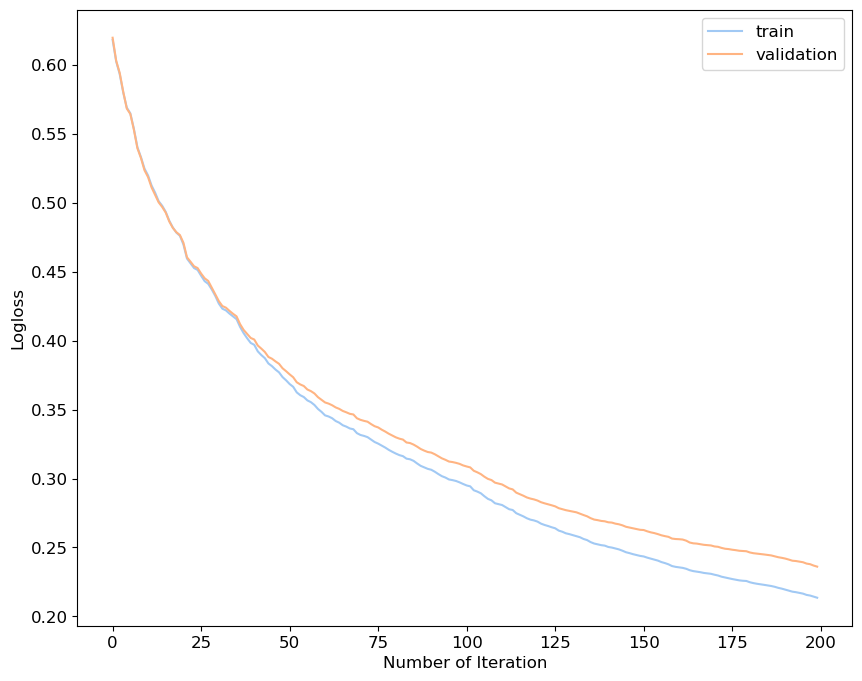

In [210]:
import matplotlib.pyplot as plt
# retrieve performance metrics
results = xgb_clf.evals_result()
# plot learning curves
plt.plot(results['validation_0']['logloss'], label='train')
plt.plot(results['validation_1']['logloss'], label='validation')
# show the legend
plt.legend()
plt.xlabel('Number of Iteration')
plt.ylabel('Logloss')
# show the plot
plt.show()

### Evaluation on Test Dataset

In [211]:
predict_eval_Data(X_test,y_test,xgb_clf)

Accuracy_score:  0.9157557207404169
Precision_score:  0.9078320428826683
Recall_score:  0.8453965612867443
F1_score: 0.87550
Brier_score_loss: 0.08424
Log_loss: 3.03647
Roc_auc_score: 0.89955
Classification Report:                precision    recall  f1-score   support

           0       0.92      0.95      0.94     13371
           1       0.91      0.85      0.88      7212

    accuracy                           0.92     20583
   macro avg       0.91      0.90      0.91     20583
weighted avg       0.92      0.92      0.92     20583



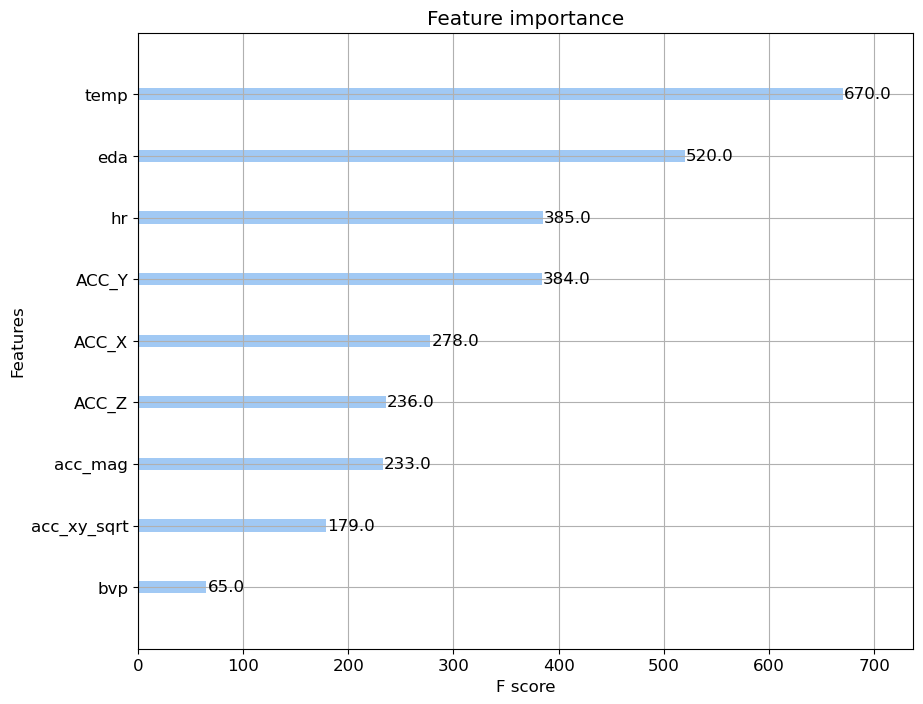

In [56]:
## Feature importance in XGBoost

xgb.plot_importance(xgb_clf)
plt.rcParams['figure.figsize'] = [6, 4]
plt.show()

### -------------------------------- End of Basic XGBoost ---------------------------------------- ###

## XGBoost with K-fold Cross Validation

In [102]:
# define data_dmatrix
data_dmatrix = xgb.DMatrix(data=X_ada,label=y_ada)

params = {"objective":"binary:logistic",'colsample_bytree': 0.8,'learning_rate': 0.8,
                'max_depth': 12, 'alpha': 10}

start_time = time.time()  # Start time

xgb_cv_clf = cv(dtrain=data_dmatrix, params=params, nfold=5,
                    num_boost_round=30, early_stopping_rounds=10, metrics="auc", as_pandas=True, seed=123)

## Execution Time capture
end_time = time.time()  # End time
execution_time = end_time - start_time  # Calculate execution time
print(f'Execution time for xgb classifier: {execution_time} seconds')  # Print execution time

Execution time for xgb classifier: 6.677524566650391 seconds


#### Execution time for xgb classifier with K-fold cross validation and auc evaluation metric: 6.677524566650391 seconds

In [58]:
# Kfold validation score on validation data
xgb_cv_clf.head()

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.838380,0.003087,0.818490,0.003358
1,0.897119,0.007125,0.876332,0.006286
2,0.915794,0.002335,0.893746,0.004218
3,0.948901,0.001881,0.928043,0.003261
4,0.965617,0.002346,0.947660,0.003629


In [107]:
start_time = time.time()  # Start time

xgb_cv_clf_logloss = cv(dtrain=data_dmatrix, params=params, nfold=5,
                    num_boost_round=30, early_stopping_rounds=10, metrics="logloss", as_pandas=True, seed=123)

## Execution Time capture
end_time = time.time()  # End time
execution_time = end_time - start_time  # Calculate execution time
print(f'Execution time for xgb classifier: {execution_time} seconds')  # Print execution time

Execution time for xgb classifier: 4.906231164932251 seconds


#### Execution time for xgb classifier with k-fold cross validation and logloss evaluation metric: 4.906231164932251 seconds

In [108]:
# Kfold validation score on validation data
xgb_cv_clf_logloss.head()

,train-logloss-mean,train-logloss-std,test-logloss-mean,test-logloss-std
0,0.528726,0.002866,0.543278,0.002974
1,0.435900,0.010762,0.459296,0.008706
2,0.396754,0.003867,0.425880,0.006311
3,0.323295,0.003906,0.359009,0.005943
4,0.269858,0.007097,0.308247,0.008789


### ---------------------------------------- End of XGB with K-cross Validation-------------------------- ###

### XGBoost with GridSearch Cross Validation with auc-roc evaluation metric

#### Function to compute Confusion matrix

In [300]:
def confusionmatrix_compute(data, result = 0):
    tp = data[1,1]
    fn = data[1,0]
    fp = data[0,1]
    tn = data[0,0]
    if result == 1:
        print('Precision =     {:.3f}'.format(tp/(tp+fp)))
        print('Recall (TPR) =  {:.3f}'.format(tp/(tp+fn)))
        print('Fallout (FPR) = {:.3e}'.format(fp/(fp+tn)))
    return tp/(tp+fp), tp/(tp+fn), fp/(fp+tn)

### Function to Evaluate Grid Search XGBoost 

In [301]:
def predict_eval_Data_gridS(y_test,y_pred):
    y_pred_test=y_pred
  
    print('Accuracy_score: ', accuracy_score(y_test, y_pred_test))
    print('Precision_score: ', precision_score(y_test, y_pred_test))
    print('Recall_score: ', recall_score(y_test, y_pred_test))
    print('F1_score: %.5f' %  f1_score(y_test, y_pred_test))
    print('Brier_score_loss: %.5f' %  brier_score_loss(y_test, y_pred_test))
    print('Log_loss: %.5f' %  log_loss(y_test, y_pred_test))
    print('Roc_auc_score: %.5f' %  roc_auc_score(y_test, y_pred_test))
    print('Classification Report: ', classification_report(y_test, y_pred_test))


#### Function to visualize confusion matrix

In [302]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

     plt.imshow(cm, interpolation='nearest', cmap=cmap)
     plt.title(title)
     plt.colorbar()
     tick_marks = np.arange(len(classes))
     plt.xticks(tick_marks, classes, rotation=45)
     plt.yticks(tick_marks, classes)

     if normalize:
         cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
     thresh = cm.max() / 2.
     for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

     plt.tight_layout()
     plt.ylabel('True Values')
     plt.xlabel('Predicted Values')
     plt.show()


def show_data(cm, print_res = 0):
    tp = cm[1,1]
    fn = cm[1,0]
    fp = cm[0,1]
    tn = cm[0,0]
    if print_res == 1:
        print('Precision =     {:.3f}'.format(tp/(tp+fp)))
        print('Recall (TPR) =  {:.3f}'.format(tp/(tp+fn)))
        print('Fallout (FPR) = {:.3e}'.format(fp/(fp+tn)))
    return tp/(tp+fp), tp/(tp+fn), fp/(fp+tn)

### XGBoost with Grid Search and roc auc metric

In [303]:
cv_params = {'max_depth': [1,2,3,4,5,6], 'min_child_weight': [1,2,3,4]}    # parameters to be tries in the grid search
fix_params = {'learning_rate': 0.8, 'n_estimators': 100, 'objective': 'binary:logistic'}   #other parameters, fixed for the moment 


xgb_gs_clf = GridSearchCV(xgb.XGBClassifier(**fix_params), cv_params, scoring = 'roc_auc', cv = 5)

In [304]:
start_time = time.time()  # Start time

xgb_gs_clf.fit(X_ada, y_ada)

## Execution Time capture
end_time = time.time()  # End time
execution_time = end_time - start_time  # Calculate execution time
print(f'Execution time for xgb classifier: {execution_time} seconds')  # Print execution time

Execution time for xgb classifier: 79.18253803253174 seconds


#### Execution time for xgb classifier: 71.85246968269348 seconds

In [305]:
xgb_gs_clf.best_params_

{'max_depth': 6, 'min_child_weight': 2}

In [306]:
xgb_gs_clf.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.8, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [307]:
xgb_gs_clf.best_score_

0.9755645191369288

In [308]:
xgdmat_train = data_dmatrix
xgdmat_test = xgb.DMatrix(X_valid, y_valid)

#fix_params = {'learning_rate': 0.8, 'n_estimators': 100, 'objective': 'binary:logistic', 'max_depth': 6, 'min_child_weight':1}

fix_params = {'learning_rate': 0.8,  'objective': 'binary:logistic', 'max_depth': 6, 'min_child_weight':1}

params_final =  fix_params

xgb_final = xgb.train(params_final, xgdmat_train, num_boost_round = 100)


### We will save the model

In [309]:
Pkl_Filename = "Pickle_XGB_gridsrch_auc_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(xgb_gs_clf, file)

In [310]:
y_pred = xgb_final.predict(xgdmat_test)
y_pred

array([0.00094923, 0.06482545, 0.2759195 , ..., 0.07886402, 0.02228287,
       0.7026333 ], dtype=float32)

### Evaluation on validation dataset

In [311]:
#predict_eval_Data(X_valid,y_valid,xgb_final)
thresh = 0.09
y_pred [y_pred > thresh] = 1
y_pred [y_pred <= thresh] = 0
predict_eval_Data_gridS(y_valid,y_pred)


Accuracy_score:  0.8106597998250898
Precision_score:  0.6532148363108733
Recall_score:  0.9899670148433205
F1_score: 0.78708
Brier_score_loss: 0.18934
Log_loss: 3.01853
Roc_auc_score: 0.85129
Classification Report:                precision    recall  f1-score   support

           0       0.99      0.71      0.83     13306
           1       0.65      0.99      0.79      7276

    accuracy                           0.81     20582
   macro avg       0.82      0.85      0.81     20582
weighted avg       0.87      0.81      0.81     20582



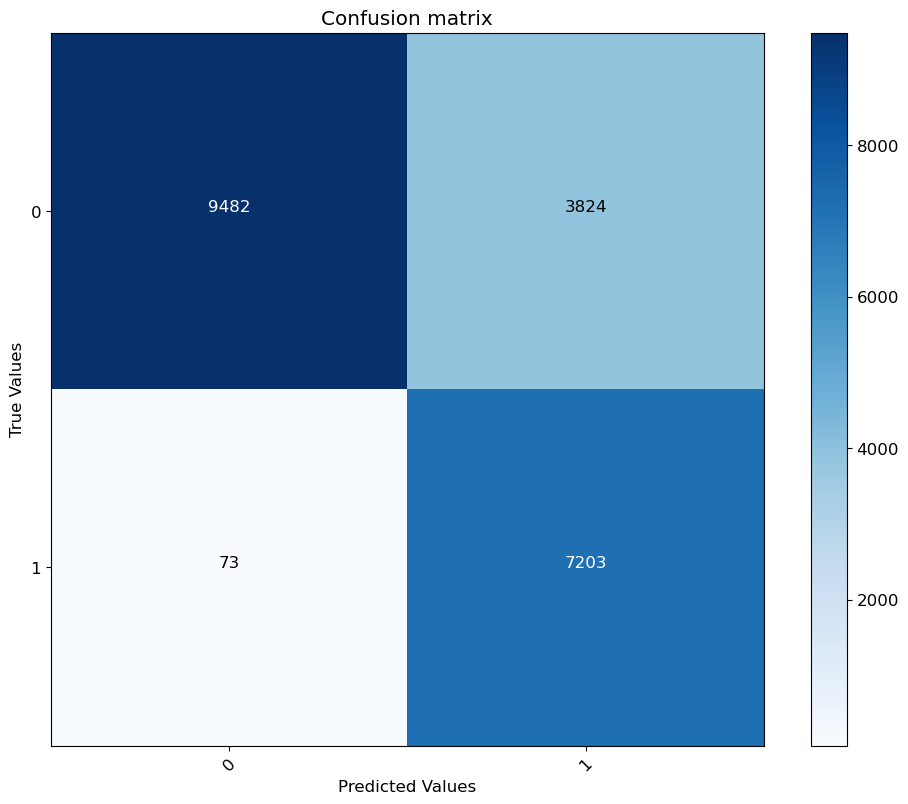

Precision =     0.653
Recall (TPR) =  0.990
Fallout (FPR) = 2.874e-01


In [312]:
thresh = 0.09
y_pred [y_pred > thresh] = 1
y_pred [y_pred <= thresh] = 0
cn_mat = confusion_matrix(y_valid, y_pred)
plot_confusion_matrix(cn_mat, ['0', '1'], )
pr, tpr, fpr = show_data(cn_mat, print_res = 1)

### XGB with GridSearch and auc-roc on test data

In [313]:
xgdmat_test = xgb.DMatrix(X_train, y_train)
y_pred = xgb_final.predict(xgdmat_test)
y_pred



array([7.2924473e-04, 2.4843993e-02, 4.9277339e-03, ..., 9.9353105e-01,
       4.1333031e-02, 1.0464306e-02], dtype=float32)

### Evaluation on test data

In [314]:
thresh = 0.09
y_pred [y_pred > thresh] = 1
y_pred [y_pred <= thresh] = 0
predict_eval_Data_gridS(y_train,y_pred)


Accuracy_score:  0.831920874544508
Precision_score:  0.6767435799771465
Recall_score:  0.9994374870473991
F1_score: 0.80703
Brier_score_loss: 0.16808
Log_loss: 2.67958
Roc_auc_score: 0.87025
Classification Report:                precision    recall  f1-score   support

           0       1.00      0.74      0.85     62273
           1       0.68      1.00      0.81     33777

    accuracy                           0.83     96050
   macro avg       0.84      0.87      0.83     96050
weighted avg       0.89      0.83      0.84     96050



### XGBoost with Grid Search and log loss metric

In [315]:
cv_params = {'max_depth': [1,2,3,4,5,6], 'min_child_weight': [1,2,3,4]}    # parameters to be tries in the grid search
fix_params = {'learning_rate': 0.8, 'n_estimators': 100, 'objective': 'binary:logistic'}   #other parameters, fixed for the moment 

# GridSearch CV with log-loss

xgb_gs_logloss_clf = GridSearchCV(xgb.XGBClassifier(**fix_params), cv_params, scoring = 'neg_log_loss', cv = 5)

In [316]:
start_time = time.time()  # Start time

xgb_gs_logloss_clf.fit(X_ada, y_ada)

## Execution Time capture
end_time = time.time()  # End time
execution_time = end_time - start_time  # Calculate execution time
print(f'Execution time for xgb classifier: {execution_time} seconds')  # Print execution time

Execution time for xgb classifier: 66.4345052242279 seconds


#### Execution time for xgb classifier with log loss: 65.03023624420166 seconds

In [317]:
xgb_gs_logloss_clf.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.8, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [318]:
xgb_gs_logloss_clf.best_params_

{'max_depth': 6, 'min_child_weight': 1}

In [319]:
xgdmat_train = data_dmatrix
xgdmat_test = xgb.DMatrix(X_valid, y_valid)

#fix_params = {'learning_rate': 0.8, 'n_estimators': 100, 'objective': 'binary:logistic', 'max_depth': 6, 'min_child_weight':1}

fix_params = {'learning_rate': 0.8,  'objective': 'binary:logistic', 'max_depth': 6, 'min_child_weight':1}

params_final =  fix_params

xgb_final = xgb.train(params_final, xgdmat_train, num_boost_round = 100)


In [320]:
y_pred_logloss = xgb_final.predict(xgdmat_test)
y_pred_logloss

array([0.00094923, 0.06482545, 0.2759195 , ..., 0.07886402, 0.02228287,
       0.7026333 ], dtype=float32)

In [321]:
y_pred_logloss[:10]

array([9.4923470e-04, 6.4825445e-02, 2.7591950e-01, 9.9931586e-01,
       6.3222654e-02, 4.8141055e-02, 9.0803014e-04, 9.9750406e-01,
       9.7639459e-01, 9.0548217e-01], dtype=float32)

In [322]:
Pkl_Filename = "Pickle_XGB_gridsrch_logloss_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(xgb_gs_logloss_clf, file)

### Evaluation on Validation Data

In [323]:
thresh = 0.05
y_pred_logloss [y_pred_logloss > thresh] = 1
y_pred_logloss [y_pred_logloss <= thresh] = 0
predict_eval_Data_gridS(y_valid,y_pred_logloss)


Accuracy_score:  0.7538140122437081
Precision_score:  0.5901706261735652
Recall_score:  0.9935404068169323
F1_score: 0.74049
Brier_score_loss: 0.24619
Log_loss: 3.92479
Roc_auc_score: 0.80813
Classification Report:                precision    recall  f1-score   support

           0       0.99      0.62      0.77     13306
           1       0.59      0.99      0.74      7276

    accuracy                           0.75     20582
   macro avg       0.79      0.81      0.75     20582
weighted avg       0.85      0.75      0.76     20582



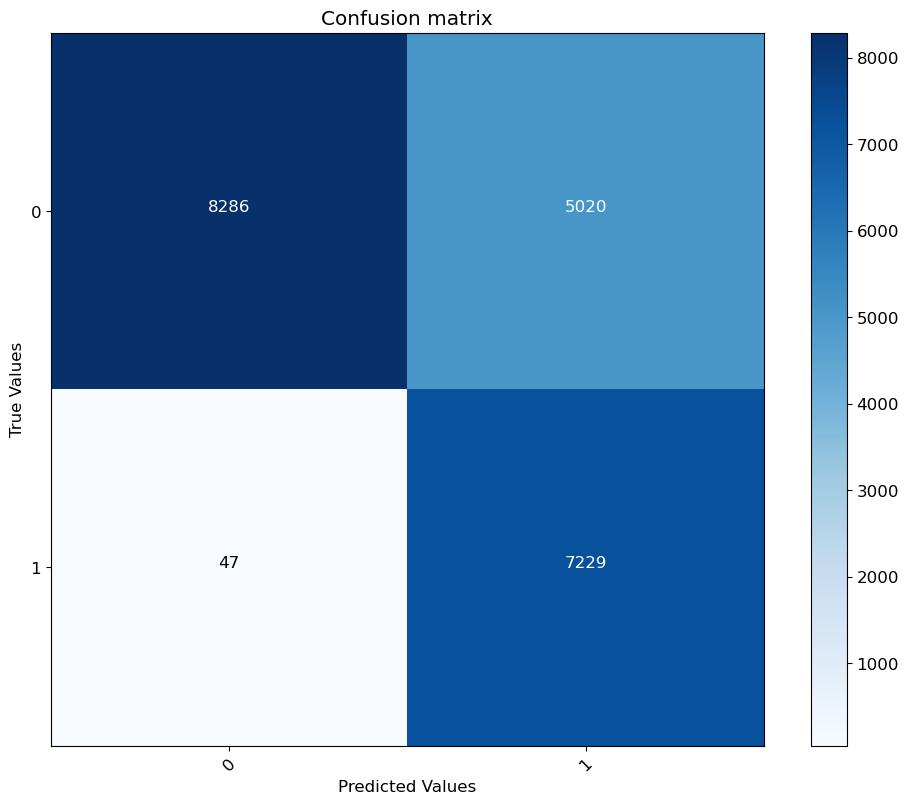

Precision =     0.590
Recall (TPR) =  0.994
Fallout (FPR) = 3.773e-01


In [324]:
#thresh = 100
y_pred_logloss [y_pred_logloss > thresh] = 1
y_pred_logloss [y_pred_logloss <= thresh] = 0
cn_mat = confusion_matrix(y_valid, y_pred_logloss)
plot_confusion_matrix(cn_mat, ['0', '1'], )
pr, tpr, fpr = show_data(cn_mat, print_res = 1)

### XGB GridSearchCv with logloss on test data

In [325]:
xgdmat_test = xgb.DMatrix(X_train, y_train)
y_pred_logloss = xgb_final.predict(xgdmat_test)
y_pred_logloss



array([7.2924473e-04, 2.4843993e-02, 4.9277339e-03, ..., 9.9353105e-01,
       4.1333031e-02, 1.0464306e-02], dtype=float32)

### Evaluation on test data

In [326]:
thresh = 0.05
y_pred_logloss [y_pred_logloss > thresh] = 1
y_pred_logloss [y_pred_logloss <= thresh] = 0
predict_eval_Data_gridS(y_train,y_pred_logloss)

Accuracy_score:  0.7675897969807391
Precision_score:  0.6021110437542345
Recall_score:  0.9997927583858839
F1_score: 0.75159
Brier_score_loss: 0.23241
Log_loss: 3.70517
Roc_auc_score: 0.82072
Classification Report:                precision    recall  f1-score   support

           0       1.00      0.64      0.78     62273
           1       0.60      1.00      0.75     33777

    accuracy                           0.77     96050
   macro avg       0.80      0.82      0.77     96050
weighted avg       0.86      0.77      0.77     96050



In [327]:
#thresh = 100
y_pred_logloss [y_pred_logloss > thresh] = 1
y_pred_logloss [y_pred_logloss <= thresh] = 0
cn_mat = confusion_matrix(y_test, y_pred_logloss)
plot_confusion_matrix(cn_mat, ['0', '1'], )
pr, tpr, fpr = show_data(cn_mat, print_res = 1)

ValueError: Found input variables with inconsistent numbers of samples: [20583, 96050]

### -------------------------------- End of GridSearchCV ---------------------------------- ##